In [1]:
import torch
import hiddenlayer as h1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("bikes_data.csv", parse_dates=True)

In [3]:
df.head()

,datetime,year,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 0:00,2011,1,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 1:00,2011,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 2:00,2011,1,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 3:00,2011,1,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 4:00,2011,1,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 14)

Text(0.5, 1.0, 'Number of bikes rented per season')

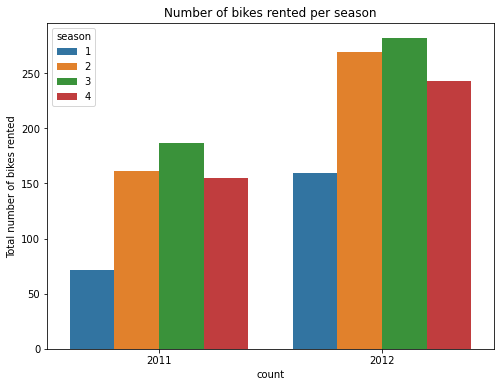

In [5]:
plt.figure(figsize=(8,6))
sns.barplot("year", "count", hue="season", data=df, ci=None)
plt.xlabel("count")
plt.ylabel("Total number of bikes rented")
plt.title("Number of bikes rented per season")

Text(0.5, 1.0, 'Number of bikes rented per month')

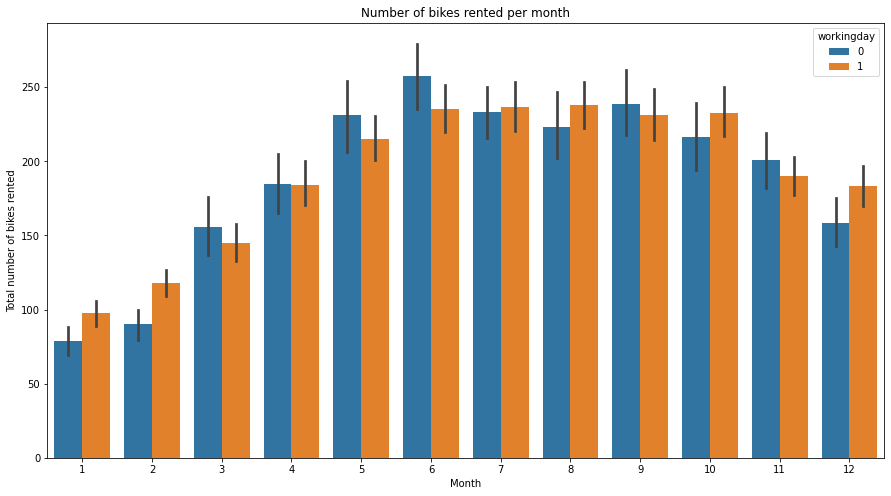

In [6]:
plt.figure(figsize=(15,8))
sns.barplot(x = "month", y = "count", hue="workingday", data=df) #, ci=None)
plt.xlabel("Month")
plt.ylabel("Total number of bikes rented")
plt.title("Number of bikes rented per month")

It looks like demand is higher on weekends

Text(0, 0.5, 'Total number of bikes rented')

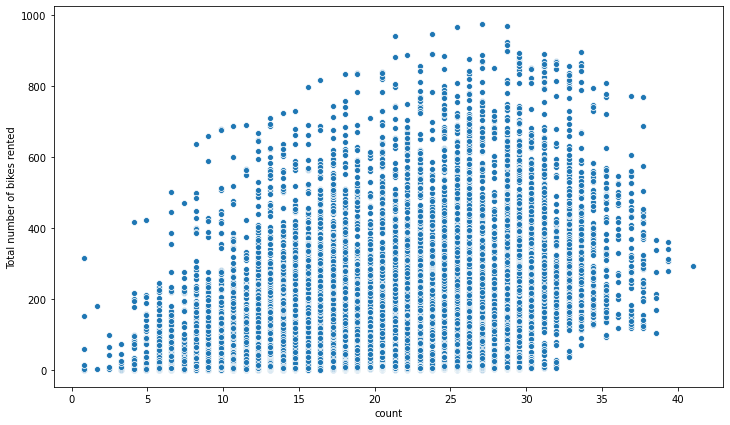

In [7]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="temp",y="count",  data=df)
plt.xlabel("count")
plt.ylabel("Total number of bikes rented")

Hotter days have higher demand

In [8]:
# create dummy variable for season
df = pd.get_dummies(df, columns=["season"])
df.head()

,datetime,year,month,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,01/01/2011 0:00,2011,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,01/01/2011 1:00,2011,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,01/01/2011 2:00,2011,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,01/01/2011 3:00,2011,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,01/01/2011 4:00,2011,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [9]:
# subset the data with columns needed for NN
columns = ["registered", "holiday", "workingday", "weather", "temp", "atemp", "season_1", "season_2", "season_3"]
features = df[columns]

In [10]:
features.head()

,registered,holiday,workingday,weather,temp,atemp,season_1,season_2,season_3
0,13,0,0,1,9.84,14.395,1,0,0
1,32,0,0,1,9.02,13.635,1,0,0
2,27,0,0,1,9.02,13.635,1,0,0
3,10,0,0,1,9.84,14.395,1,0,0
4,1,0,0,1,9.84,14.395,1,0,0


In [11]:
target = df[["count"]]

In [12]:
target.head()

,count
0,16
1,40
2,32
3,13
4,1


In [13]:
# Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [14]:
# transform arrays into tensors
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(X_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [15]:
X_train_tensor.shape

torch.Size([8708, 9])

In [16]:
Y_train_tensor.shape

torch.Size([8708, 1])

In [17]:
import torch.utils.data as data_utils  # helps feeding data in batches

In [18]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [19]:
train_loader = data_utils.DataLoader(train_data, batch_size=1000, shuffle=True)
# specified the batch size and set shuffle on so no unreliable paterns are created

In [20]:
len(train_loader) # number of rows / batch size

9

In [21]:
features_batch, target_batch = iter(train_loader).next() 

In [22]:
features_batch.shape

torch.Size([1000, 9])

In [23]:
target_batch.shape

torch.Size([1000, 1])

In [24]:
inp = X_train_tensor.shape[1] # number of train features
outp = 1 # the prediction of count
hidden = 10 # 10 hiddel layers
loss_fn = torch.nn.MSELoss()

In [25]:
# build NN model
model = torch.nn.Sequential(torch.nn.Linear(inp, hidden),
                           torch.nn.Linear(hidden, outp))

In [26]:
# build optimizer - adam - learning rate 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [27]:
total_step = len(train_loader) # load data in batches

num_epochs = 10_000 

for epoch in range(num_epochs +1):
    for i, (features, target) in enumerate(train_loader): # for each epoch, feed train data in batches
        
        # forward pass and loss calc
        output = model(features)
        loss = loss_fn(output, target)
       ###########
    
    # calculate loss
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step() # to update model parameters
        
        if epoch % 2000 == 0: # every 2000 epochs, print epoch, step and loss of model
            print("Epoch [{}/{}], Step [{}/{}, Loss: {:.4f}]".format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10000], Step [1/9, Loss: 52980.1094]
Epoch [1/10000], Step [2/9, Loss: 55046.2344]
Epoch [1/10000], Step [3/9, Loss: 56894.2383]
Epoch [1/10000], Step [4/9, Loss: 58398.0938]
Epoch [1/10000], Step [5/9, Loss: 53839.8398]
Epoch [1/10000], Step [6/9, Loss: 58701.9219]
Epoch [1/10000], Step [7/9, Loss: 63299.9453]
Epoch [1/10000], Step [8/9, Loss: 53493.7734]
Epoch [1/10000], Step [9/9, Loss: 56888.5273]
Epoch [2001/10000], Step [1/9, Loss: 1124.0731]
Epoch [2001/10000], Step [2/9, Loss: 1192.5935]
Epoch [2001/10000], Step [3/9, Loss: 1078.5048]
Epoch [2001/10000], Step [4/9, Loss: 1117.5526]
Epoch [2001/10000], Step [5/9, Loss: 1179.4460]
Epoch [2001/10000], Step [6/9, Loss: 1481.6616]
Epoch [2001/10000], Step [7/9, Loss: 1341.7612]
Epoch [2001/10000], Step [8/9, Loss: 1128.3302]
Epoch [2001/10000], Step [9/9, Loss: 1215.4572]
Epoch [4001/10000], Step [1/9, Loss: 1142.3110]
Epoch [4001/10000], Step [2/9, Loss: 1096.7343]
Epoch [4001/10000], Step [3/9, Loss: 1261.0900]
Epoch [400

In [28]:
# switch NN to evaluation mode
model.eval() # to enrure dropout and batch normalization layers are in evaluation mode for predictions


with torch.no_grad():
    y_pred = model(x_test_tensor) # make predictions

In [29]:
# work with 1 sample of the data (1 row of data)
sample = X_test.iloc[453]
sample

registered     8.00
holiday        0.00
workingday     0.00
weather        1.00
temp           9.84
atemp         12.12
season_1       1.00
season_2       0.00
season_3       0.00
Name: 555, dtype: float64

In [30]:
# convert X_test row to tensor
sample_tensor = torch.tensor(sample.values, dtype = torch.float)
sample_tensor

tensor([ 8.0000,  0.0000,  0.0000,  1.0000,  9.8400, 12.1200,  1.0000,  0.0000,
         0.0000])

In [31]:
# check predicted value against actual value
with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted count: ", (y_pred.item()))
print("Actual count: ", (y_test.iloc[453]))

Predicted count:  33.51370620727539
Actual count:  count    8
Name: 555, dtype: int64


In [32]:
# compare all predicted data to atual data y_test
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [33]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(2178, 1)

In [34]:
y_test.values.shape

(2178, 1)

In [35]:
# create a df to compare y_pred and y_test
compare_df = pd.DataFrame({"actual": np.squeeze(y_test.values), "predicted": np.squeeze(y_pred)})
compare_df.sample(15)

,actual,predicted
830,365,396.600403
379,212,198.186234
1253,62,43.049553
252,320,305.626404
1582,107,150.060654
297,207,228.561737
913,214,196.475006
1036,365,331.120728
1757,246,203.487991
1784,110,123.985275


In [36]:
# use R2 to measure how much variance is captured by the model
sklearn.metrics.r2_score(y_test, y_pred)

0.9631112273935315

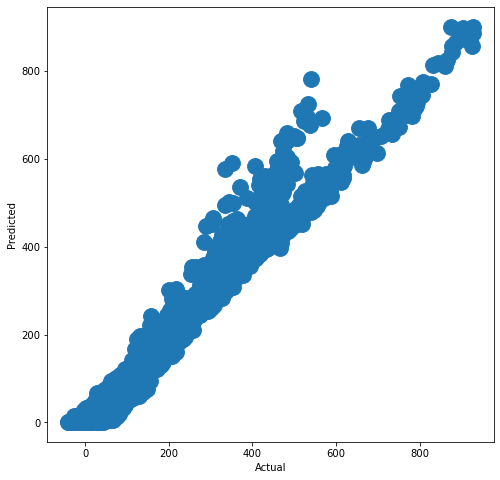

In [37]:
# plot actual values against predicted values
plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test.values, s=250)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Actual values map very closely to the preicted values of the model